# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
posteriors = pd.read_csv(os.path.join(results_path, 'posteriors_shared_revised.csv'))
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [4]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [5]:
param_short = parameters.iloc[:900]

# Posteriors

In [ ]:
posteriors

In [ ]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = np.array(['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3'])
figsize      = (18, 18)
alpha        = 0.4

In [ ]:
dimensions = posteriors.columns.values.reshape(5,5)
rows       = dimensions[:,0].size
columns    = dimensions[0,:].size

In [ ]:
plt.subplots(figsize=figsize)
position = 1
for each_beta in range(rows):
    for each_class in range(columns):
        name_temp = posteriors.columns.values.reshape(rows, columns)[each_beta,each_class]
        plot_temp = plt.subplot(rows, columns, position)
        sns.kdeplot(posteriors['%s' % str(name_temp)], shade=True, alpha=alpha, color=palette[each_beta])
        plt.legend(loc='upper right', fontsize=15)
        plt.axvline(x=0, linestyle="--", color='black')
        plt.xlabel(r"%s" % str(name_temp), fontsize=20)
        plt.tick_params('both', labelsize='20')
        plt.xlim([-1.5,1.5])
        plt.ylim([0,4.5])      
        if (each_class==0):
            plt.ylabel("$\,$ WHAN \n %s" % whan_classes[each_beta], fontsize=20)       
        elif (each_class!=0): 
            plot_temp.yaxis.set_visible(False)            
        position+=1

plt.tight_layout()
plt.savefig(os.path.join(results_path, '25betas_shared_revised.png'), bbox_inch='tight')
plt.savefig(os.path.join(results_path, '25betas_shared_revised.pdf'), bbox_inch='tight')
plt.show()

# Simplifying the probabilities' dataframe

In [ ]:
entire_fit = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'))

In [ ]:
entire_fit.keys()

In [ ]:
header = np.array(entire_fit.keys())

In [ ]:
prob_keys = []
for i in header:
    if i[0:4]=='prob':
        prob_keys.append(i)
    else:
        continue

In [ ]:
probabilities = entire_fit[prob_keys]

In [ ]:
probabilities

In [ ]:
probabilities_transposed = probabilities.T

In [ ]:
print(probabilities_transposed.columns)

In [ ]:
iterations = probabilities_transposed.columns.size
new_header = []
for i in range(iterations):
    new_header.append('itr%i' % i)
print(len(new_header))

In [ ]:
probabilities_transposed.columns = new_header

In [ ]:
probabilities_transposed

In [ ]:
percentiles = [0.025, 0.25, 0.50, 0.75, 0.975]

In [ ]:
lines = probabilities_transposed.iloc[:, 0].size

for i in range(lines):   
    if i==0:
        stats_temp    = probabilities_transposed.iloc[i, :].describe(percentiles=percentiles)
        shrinked_temp = pd.DataFrame(stats_temp)
    else:
        stats_temp    = pd.DataFrame(probabilities_transposed.iloc[i, :].describe(percentiles=percentiles))
        shrinked_temp = shrinked_temp.join(stats_temp)
shrinked_df = shrinked_temp.T
shrinked_df

In [ ]:
print(shrinked_df.values.shape, parameters.shape)

In [ ]:
loc = shrinked_df.iloc[0, :].size
print(loc)

In [ ]:
shrinked_df.insert(loc=loc, value=parameters['LOG_STELLAR_MASS'].values, column='LOG_STELLAR_MASS')

In [ ]:
shrinked_df.insert(loc=(loc+1), value=parameters['Z'].values, column='Z')

In [ ]:
shrinked_df

In [ ]:
shrinked_df.to_csv(os.path.join(results_path, 'allprobabilities_summ_revised.csv'))

In [ ]:
step = 900
prob01 = shrinked_df.iloc[:step, :]
prob02 = shrinked_df.iloc[step:(step*2), :]
prob03 = shrinked_df.iloc[(step*2):(step*3), :]
prob04 = shrinked_df.iloc[(step*3):(step*4), :]
prob05 = shrinked_df.iloc[(step*4):(step*5), :]

### Testing first class

In [ ]:
zu = np.unique(prob01['LOG_STELLAR_MASS'].values)

In [ ]:
subset = prob01[prob01['LOG_STELLAR_MASS'].values==zu[6]]

In [ ]:
plt.plot(subset['Z'], subset['50%'], '--')
plt.plot(subset['Z'], subset['25%'], '--')
plt.plot(subset['Z'], subset['75%'], '--')
plt.ylim([0,0.5])
plt.show()

In [ ]:
np.unique(prob01['Z'].values)

In [ ]:
subset = prob01[prob01['Z']<0.07]

In [ ]:
subset

In [ ]:
plt.plot(subset['LOG_STELLAR_MASS'], subset['mean'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['25%'], '--')
plt.plot(subset['LOG_STELLAR_MASS'], subset['75%'], '--')
plt.show()

# Checking automatic summary from STAN

In [ ]:
summary_stan = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [ ]:
summary_stan

In [ ]:
prob01_stan = summary_stan.iloc[:900, :]

In [ ]:
prob01_stan

In [ ]:
chosen_mass = np.unique(prob01_stan['LOG_STELLAR_MASS'].values)[12]

In [ ]:
chosen_mass

In [ ]:
subset_temp = prob01_stan[prob01_stan['LOG_STELLAR_MASS']==chosen_mass]

In [ ]:
# subset_temp

In [ ]:
# plt.plot(subset_temp['Z'], subset_temp['50%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['25%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['75%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['2.5%'], '--')
# plt.plot(subset_temp['Z'], subset_temp['97.5%'], '--')
# plt.show()

In [ ]:
# %matplotlib notebook

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_trisurf(prob01_stan['Z'], prob01_stan['LOG_STELLAR_MASS'], prob01_stan['mean'], color='#a6611a', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.plot_trisurf(prob01['Z'], prob01['LOG_STELLAR_MASS'], prob01['mean'], color='blue', alpha=0.8, 
#                 linewidth=0, antialiased=False)
# ax.set_xlabel("\n z", fontsize=14)
# ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
# ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
# for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
# ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
# ax.view_init(elev=22., azim=315)
# plt.show()

In [ ]:
# prob01.boxplot(column='50%')

In [ ]:
# prob01_stan.boxplot(column='50%')

# Last check to be 100% sure (for one class - class 1 - lineless)

In [6]:
m = 10.5
z = np.unique(param_short['Z'].values)
p = posteriors

In [8]:
# regression = []
regression_temp = []
for i in range(p['beta[1,1]'].values.size):
    for redshift in range(z.size):
        a = p['beta[1,1]'].values[i]
        b = p['beta[2,1]'].values[i] * z[redshift]
        c = p['beta[3,1]'].values[i] * z[redshift]**2
        d = p['beta[4,1]'].values[i] * m
        e = p['beta[5,1]'].values[i] * m**2
        
        f_x = np.sum([a,b,c,d,e])
        p_i = 1./(1+np.exp(-f_x))
        regression_temp.append([p_i, z[redshift], int(i)])
regression = np.array(regression_temp)

In [15]:
prob  = regression[:,0]
redsh = regression[:,1]
beta  = regression[:,2]

In [30]:
idx = np.where(beta==0)

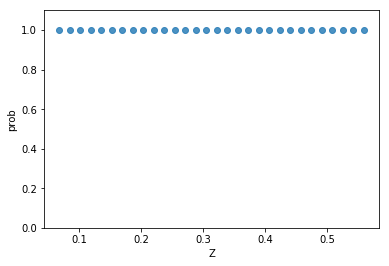

In [34]:
plt.plot(redsh[idx], prob[idx], 'o', alpha=0.8)
plt.xlabel("Z")
plt.ylabel("prob")
plt.ylim([0,1.1])
plt.show()